# Project 6 Moosic

agreed upon features: `danceability`, `energy`, `acousticness`, `instrumentalness`, `valence`, `tempo`

agreed upon scaler: `MinMaxScaler`

### Import necessary libraries and modules

In [1]:
import os
import pandas as pd
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Load the datasets, set `song_name` and `artist` as the index

In [ ]:
# small dataset 10 songs
path = '/Users/nursahkurt/Desktop/Moosic/data/df_audio_features_10.csv'
songs_data_df = pd.read_csv(path, index_col=["artist","song_name"])

In [ ]:
# medium dataset 1000 songs
path = '/Users/nursahkurt/Desktop/Moosic/data/df_audio_features_1000.csv'"
songs_data_df = pd.read_csv(path, index_col=["artist","name"])

In [2]:
# big dataset 5000 songs
path = '/Users/nursahkurt/Desktop/Moosic/data/df_audio_features_5000.csv'
songs_data_df = pd.read_csv(path, index_col=["artist","name"])

In [ ]:
songs_data_df.head()

### Drop unnecessary columns (see above)

In [ ]:
# for small dataset
songs_data_clean_df = songs_data_df.drop(["loudness", "duration_ms", "time_signature", "id", "html", "speechiness", "mode", "key"], axis=1)

In [3]:
# for medium and big dataset
songs_data_clean_df = songs_data_df.drop(["liveness", "loudness", "type", "duration_ms", "time_signature", "id", "html", "speechiness", "mode", "key"], axis=1)

In [ ]:
songs_data_clean_df.head()

### Features to look at:

In [6]:
x = "energy"
y = "danceability"

### Plot the cleaned data in relation to the above defined features

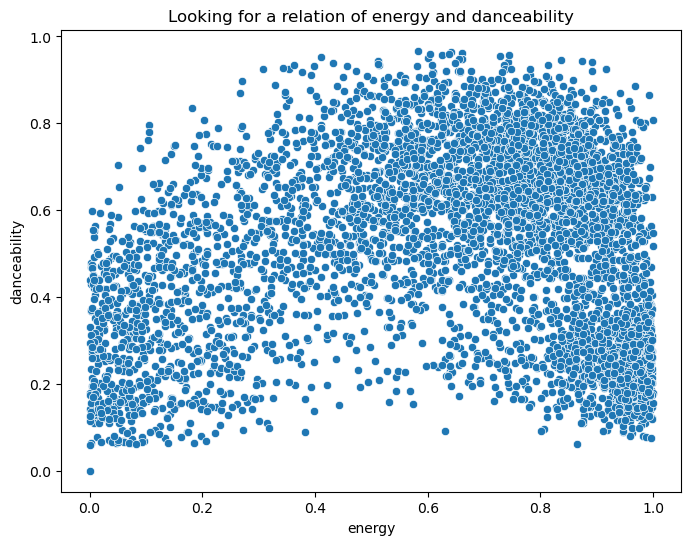

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=songs_data_clean_df, x=x, y=y)
plt.title(f'Looking for a relation of {x} and {y}')
plt.show()

### Scale the dataset

In [8]:
# min-max scaler
song_sk_pre_mima = MinMaxScaler().fit_transform(songs_data_clean_df)
song_sk_pre_mima_df = pd.DataFrame(song_sk_pre_mima, columns=songs_data_clean_df.columns, index=songs_data_clean_df.index)
song_sk_pre_mima_df

,,danceability,energy,acousticness,instrumentalness,valence,tempo
artist,name,,,,,,
Gilberto Gil,Se Eu Quiser Falar Com Deus,0.680455,0.25900,0.696787,0.000060,0.310660,0.515800
Antônio Carlos Jobim,Saudade De Bahia,0.767322,0.39900,0.217871,0.000002,0.703553,0.584322
Martinho Da Vila,"Canta Canta, Minha Gente",0.880041,0.73000,0.454819,0.000064,0.918782,0.437862
Chico César,Mulher Eu Sei,0.729059,0.05020,0.882530,0.000041,0.531980,0.499098
Kurt Elling,Rosa Morena,0.673216,0.11900,0.919679,0.000348,0.408122,0.565171
...,...,...,...,...,...,...,...
Pyotr Ilyich Tchaikovsky,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.208893,0.06940,0.920683,0.725888,0.066497,0.410795
Tristan Murail,"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.194416,0.10100,0.858434,0.432487,0.036041,0.388495
Arnold Schoenberg,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.061634,0.00093,0.954819,0.983756,0.034924,0.334469


## KMeans

In [9]:
from sklearn.cluster import KMeans

In [10]:
# number of clusters
n_clust = 16

In [11]:
# clustering based on min-max scaler
song_kmeans = KMeans(n_clusters=n_clust)
song_kmeans.fit(song_sk_pre_mima_df)
clusters = song_kmeans.predict(song_sk_pre_mima_df)
song_sk_pre_mima_df["cluster"] = clusters

In [ ]:
song_sk_pre_mima_df

In [ ]:
song_sk_pre_mima_df.loc[song_sk_pre_mima_df["cluster"] == 14].sample(10)

### Plot the centroids in the scattered dataset

In [12]:
song_kmeans.cluster_centers_

array([[0.55437567, 0.50553675, 0.48125577, 0.01933818, 0.40918728,
        0.55465679],
       [0.26092536, 0.90502215, 0.00749273, 0.87764681, 0.21773554,
        0.56687573],
       [0.2822281 , 0.10499846, 0.94914315, 0.88801784, 0.10755751,
        0.4693442 ],
       [0.29257835, 0.94279224, 0.00580496, 0.0649966 , 0.1766025 ,
        0.5575947 ],
       [0.34922888, 0.16313032, 0.91873982, 0.0548208 , 0.17709754,
        0.49352708],
       [0.7952165 , 0.567849  , 0.13711134, 0.01259164, 0.79833109,
        0.5150782 ],
       [0.71973141, 0.83415582, 0.07354017, 0.01457612, 0.82163418,
        0.5945471 ],
       [0.73453045, 0.72774952, 0.09045271, 0.00875775, 0.51044277,
        0.52261108],
       [0.63747743, 0.57710169, 0.6818205 , 0.02177046, 0.82313516,
        0.58355794],
       [0.51969032, 0.24244913, 0.88519619, 0.84568528, 0.40924269,
        0.56711279],
       [0.60600659, 0.28686368, 0.81931912, 0.04000811, 0.50807298,
        0.53264597],
       [0.63061966, 0

In [15]:
cl_pos = pd.DataFrame(song_kmeans.cluster_centers_)
cl_pos.columns = ["danceability", "energy", "acousticness", "instrumentalness", "valence", "tempo"]

In [ ]:
song_sk_pre_mima_df.head(1)

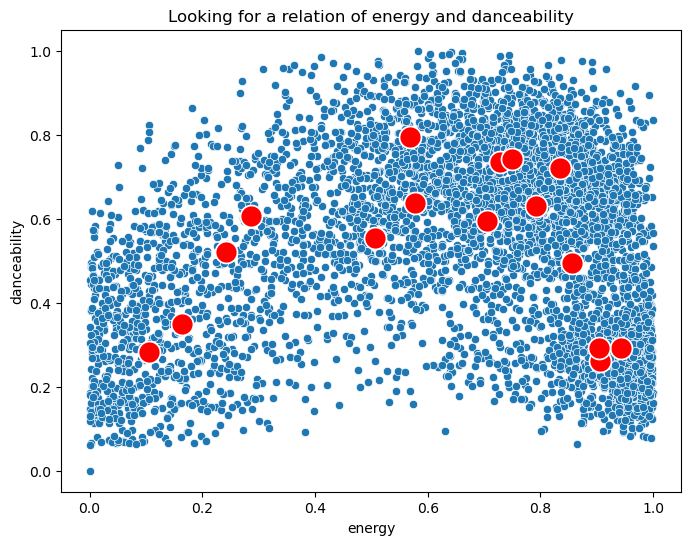

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=song_sk_pre_mima_df, x=x, y=y)
sns.scatterplot(data=cl_pos, x=x, y=y, color='red', s=250)
plt.title(f'Looking for a relation of {x} and {y}')
plt.show()

### 2D Plot the centroids in the scattered dataset with the clusters in different colours

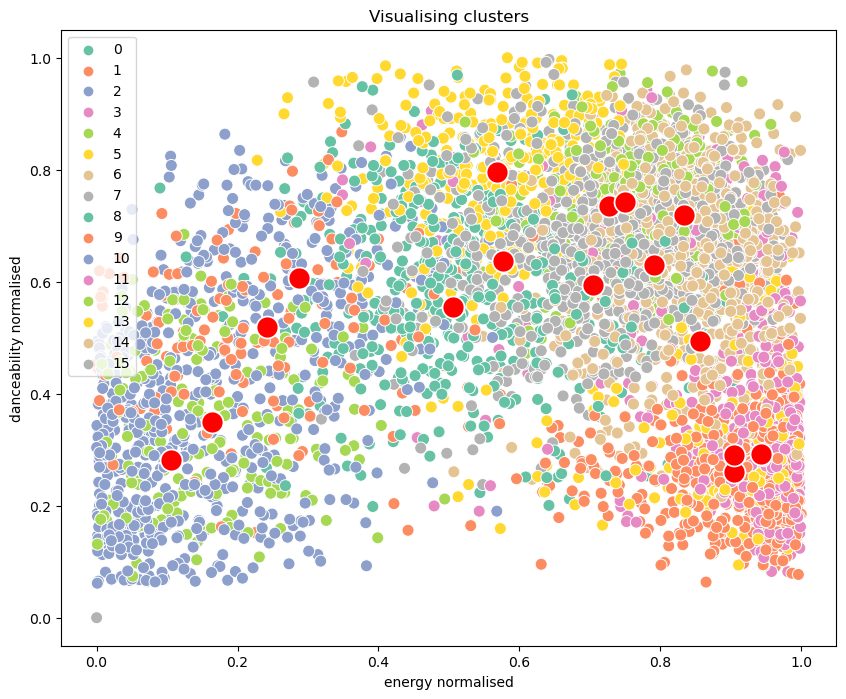

In [17]:
# create plot dataframe
song_sk_pre_mima_df["cluster"] = song_kmeans.labels_
# size and plot titles
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Visualising clusters')
plt.xlabel(f'{x} normalised')
plt.ylabel(f'{y} normalised')
# scatter plot
sns.scatterplot(data=song_sk_pre_mima_df, x=x, y=y, hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=cl_pos, x=x, y=y, color='red', s=250)
plt.show()

### Group by cluster and plot heatmap

In [ ]:
song_sk_pre_mima_df.groupby(by="cluster").mean()

In [18]:
centroids = song_kmeans.cluster_centers_
centr_df = pd.DataFrame(centroids)
centr_df

,0,1,2,3,4,5
0,0.554376,0.505537,0.481256,0.019338,0.409187,0.554657
1,0.260925,0.905022,0.007493,0.877647,0.217736,0.566876
2,0.282228,0.104998,0.949143,0.888018,0.107558,0.469344
3,0.292578,0.942792,0.005805,0.064997,0.176603,0.557595
4,0.349229,0.163130,0.918740,0.054821,0.177098,0.493527
5,0.795217,0.567849,0.137111,0.012592,0.798331,0.515078
6,0.719731,0.834156,0.073540,0.014576,0.821634,0.594547
7,0.734530,0.727750,0.090453,0.008758,0.510443,0.522611
8,0.637477,0.577102,0.681821,0.021770,0.823135,0.583558
9,0.519690,0.242449,0.885196,0.845685,0.409243,0.567113


In [19]:
eucl_centr_df = pd.DataFrame(pairwise_distances(centr_df),
                    index=centr_df.index,
                    columns=centr_df.index)

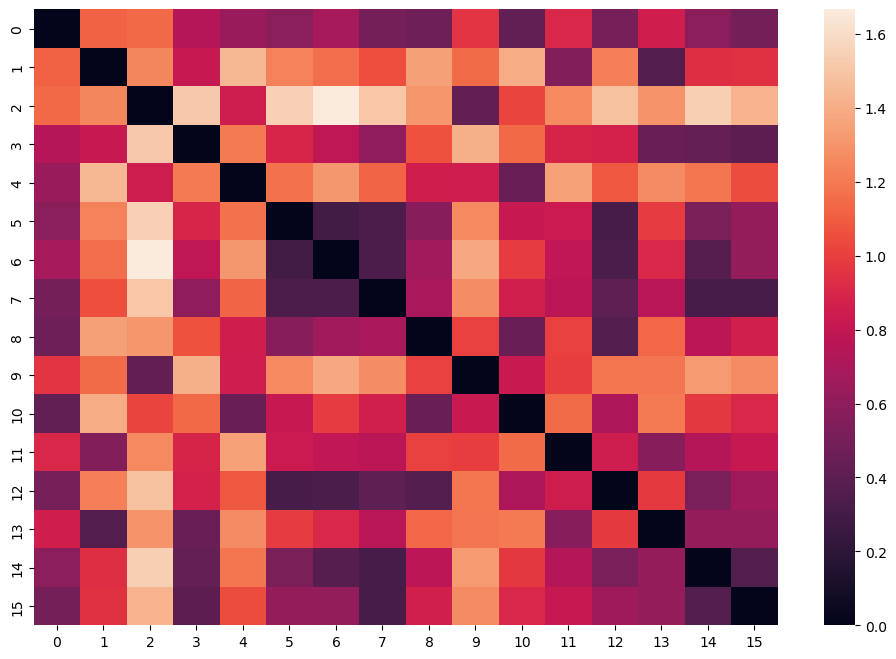

In [20]:
plt.subplots(figsize=(12, 8))
sns.heatmap(eucl_centr_df);

### Calculate inerta

In [21]:
song_kmeans = KMeans(n_clusters=n_clust)
song_kmeans.fit(song_sk_pre_mima_df)
song_kmeans.inertia_

365.4002538666361

In [22]:
k_max = n_clust
inertia_list = []

for i in range(1, k_max):
    song_kmeans = KMeans(n_clusters=i)
    song_kmeans.fit(song_sk_pre_mima_df)
    inertia_list.append(round(song_kmeans.inertia_));

In [23]:
inertia_list

[118708,
 32183,
 11994,
 7629,
 5436,
 4102,
 3306,
 2439,
 2049,
 1770,
 1404,
 1112,
 880,
 686,
 518]

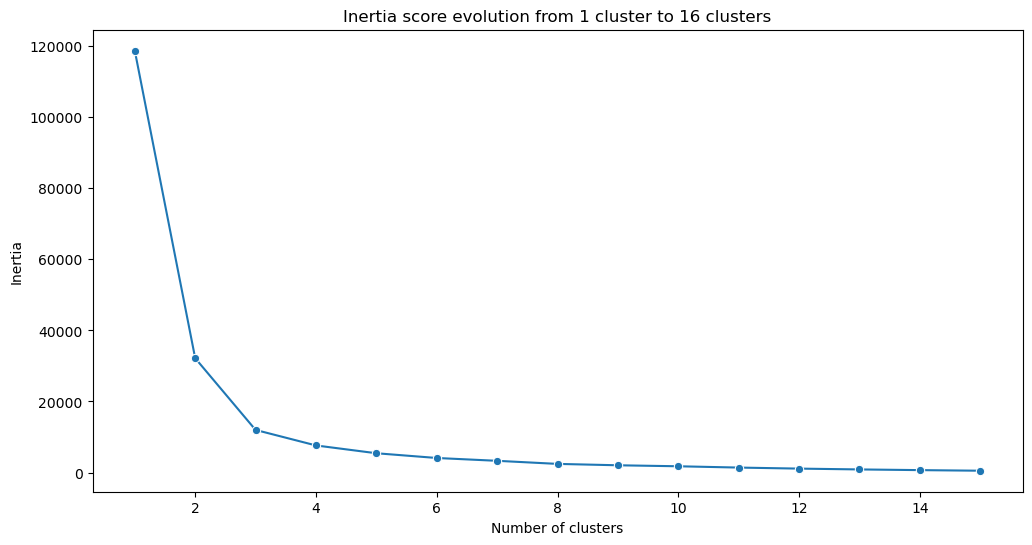

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia score evolution from 1 cluster to {k_max} clusters')
sns.lineplot(x=range(1, k_max), y=inertia_list, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### The silhouette coefficient

In [25]:
silhouette_score(songs_data_clean_df, song_kmeans.labels_)

-0.22762390898389212

The silhouette coefficient can vary between -1 and +1:

+1 --> the instance is well inside its own cluster and far from other clusters.

 0 --> the instance is close to a cluster boundary.

-1 --> the instance may have been assigned to the wrong cluster.

In [26]:
k_max = n_clust
sil_score = []

for k in range(2, k_max):
    labels = KMeans(n_clusters=k).fit(songs_data_clean_df).labels_
    sil_score.append(silhouette_score(songs_data_clean_df, labels));

In [27]:
sil_score

[0.5616040044143409,
 0.5955321686502573,
 0.5601807585883553,
 0.5655154865163986,
 0.5626014247191066,
 0.5516148179622211,
 0.55346780195071,
 0.5427958520182714,
 0.5409251979074536,
 0.5344770846055088,
 0.5168075046693494,
 0.5281320124165771,
 0.5239027964598582,
 0.5173181143649668]

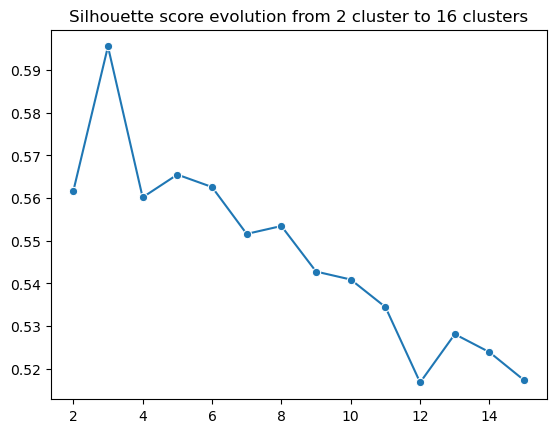

In [28]:
plt.title(f'Silhouette score evolution from 2 cluster to {k_max} clusters')
sns.lineplot(x=range(2, k_max), y=sil_score, marker='o')
plt.show();

## Radar / Spider-Plot

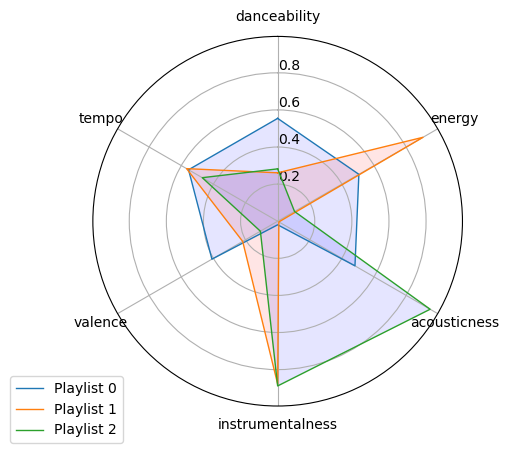

In [38]:
# Source: https://www.python-graph-gallery.com/391-radar-chart-with-several-individuals
# Libraries

from math import pi

# Set data
radar_df = cl_pos.reset_index().rename(columns={'index':'cluster'})

# ------- PART 1: Create background

# number of variable
categories= radar_df.columns.tolist()[1:]
# list(df)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(ticks=None, labels=None)
# plt.ylim(0,40)


# pick three playlists

pl1 = 0
pl2 = 1
pl3 = 2

# ------- PART 2: Add plots

# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable

# Ind1
values=radar_df.loc[pl1].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label=f"Playlist {pl1}")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind2
values=radar_df.loc[pl2].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label=f"Playlist {pl2}")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=radar_df.loc[pl3].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label=f"Playlist {pl3}")
ax.fill(angles, values, 'b', alpha=0.1)


# # Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

In [ ]:
song_sk_pre_mima_df.loc[song_sk_pre_mima_df["cluster"] == 14].sample(10)

## Difference KMeans and BisectingKMeans

K-means and bisecting k-means are both clustering algorithms used in unsupervised learning. The main difference between them is that bisecting k-means is more efficient when it comes to computation time. In each bisecting step of bisecting k-means, only the data points of one cluster and two centroids are involved in the computation. Thus, the computation time is reduced. While k-means is known to yield clusters of varied sizes, bisecting k-means results in clusters of comparable sizes.

## BisectingKMeans

In [ ]:
from sklearn.cluster import BisectingKMeans

In [ ]:
# number of clusters
n_clust = 16

In [ ]:
# clustering based on min-max scaler
song_bskmean = BisectingKMeans(n_clusters=n_clust, bisecting_strategy='biggest_inertia')
song_bskmean.fit(song_sk_pre_mima_df)
song_bskmean.labels_
bskmean_clusters = song_bskmean.predict(song_sk_pre_mima_df)
song_sk_pre_mima_df["bskmean_cluster"] = bskmean_clusters

### Plot the centroids in the scattered dataset

In [ ]:
song_bskmean.cluster_centers_

cl_pos = pd.DataFrame(song_bskmean.cluster_centers_)
cl_pos.columns = ["danceability", "energy", "acousticness", "instrumentalness", "valence", "tempo"]#, "bskmean_cluster"] 

In [ ]:
song_sk_pre_mima_df.head(1) 

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=song_sk_pre_mima_df, x=x, y=y)
sns.scatterplot(data=cl_pos, x=x, y=y, color='red', s=250)
plt.title(f'Looking for a relation of {x} and {y}')
plt.show() 

### Plot the centroids in the scattered dataset with the clusters in different colours

In [ ]:
# create plot dataframe
song_sk_pre_mima_df["bskmean_cluster"] = song_bskmean.labels_
# size and plot titles
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Visualising clusters')
plt.xlabel(f'{x} normalised')
plt.ylabel(f'{y} normalised')
# scatter plot
sns.scatterplot(data=song_sk_pre_mima_df, x=x, y=y, hue='bskmean_cluster', palette='Set2', s=75)
sns.scatterplot(data=cl_pos, x=x, y=y, color='red', s=250)
plt.show()

### Group by cluster and plot heatmap

In [ ]:
song_sk_pre_mima_df.groupby(by="bskmean_cluster").mean()

In [ ]:
centroids = song_bskmean.cluster_centers_
centr_df = pd.DataFrame(centroids)
centr_df

In [ ]:
eucl_centr_df = pd.DataFrame(pairwise_distances(centr_df),
                    index=centr_df.index,
                    columns=centr_df.index)

In [ ]:
plt.subplots(figsize=(12, 8))
sns.heatmap(eucl_centr_df);

In [ ]:
song_sk_pre_mima_df.groupby(by='bskmean_cluster').count().sort_values(by='energy', ascending=False)

In [ ]:
song_sk_pre_mima_df.describe()

### Calculate Inertia

In [ ]:
song_bskmeans = BisectingKMeans(n_clusters=n_clust)
song_bskmeans.fit(song_sk_pre_mima_df)
song_bskmeans.inertia_

In [ ]:
k_max = n_clust
inertia_list = []

for i in range(1, k_max):
    song_bskmeans = BisectingKMeans(n_clusters=i)
    song_bskmeans.fit(song_sk_pre_mima_df)
    inertia_list.append(round(song_bskmeans.inertia_));

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia score evolution from 1 cluster to {k_max} clusters')
sns.lineplot(x=range(1, k_max), y=inertia_list, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### The Silhouette Coefficient

In [ ]:
k_max = n_clust
sil_score = []

for k in range(2, k_max):
    labels = BisectingKMeans(n_clusters=k).fit(songs_data_clean_df).labels_
    sil_score.append(silhouette_score(songs_data_clean_df, labels));

In [ ]:
sil_score

In [ ]:
plt.title(f'Silhouette score evolution from 2 cluster to {k_max} clusters')
sns.lineplot(x=range(2, k_max), y=sil_score, marker='o')
plt.show();

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
song_dbscan = DBSCAN(eps=0.33, min_samples=2)
song_dbscan.fit(song_sk_pre_mima_df)
song_dbscan.labels_
dbscan_clusters = song_dbscan.fit_predict(song_sk_pre_mima_df)
song_sk_pre_mima_df["dbscan_cluster"] = dbscan_clusters

In [ ]:
song_sk_pre_mima_df

In [ ]:
song_sk_pre_mima_df.loc[song_sk_pre_mima_df["cluster"] == 1].count()

In [ ]:
song_sk_pre_mima_df.groupby(by='cluster').count().sort_values(by='energy', ascending=False)